Total Training Images: 60000
Image Shape: torch.Size([1, 28, 28])
Value Range: Min=0.0000, Max=1.0000


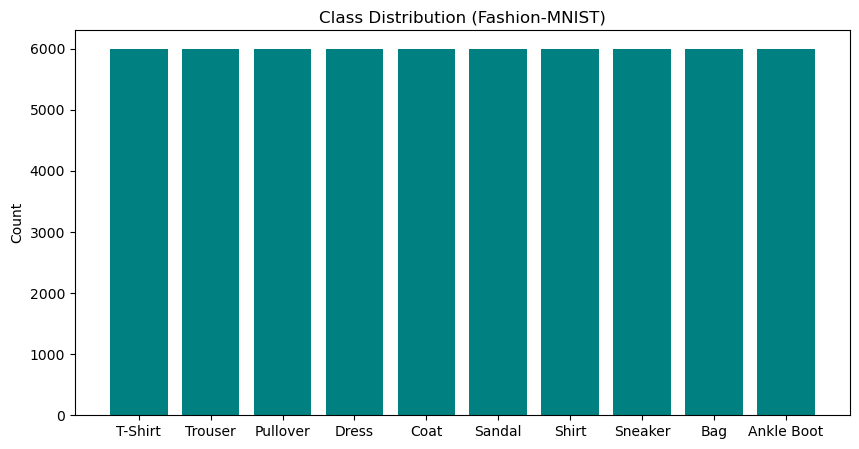

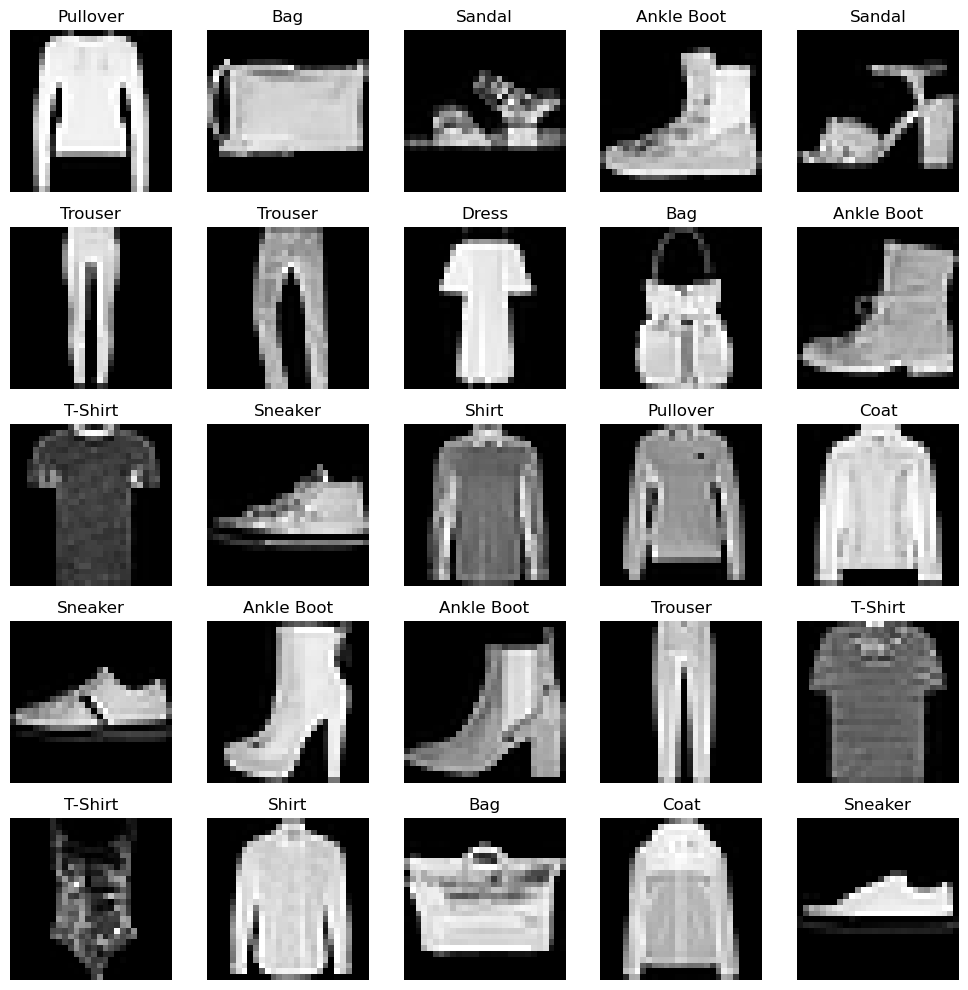

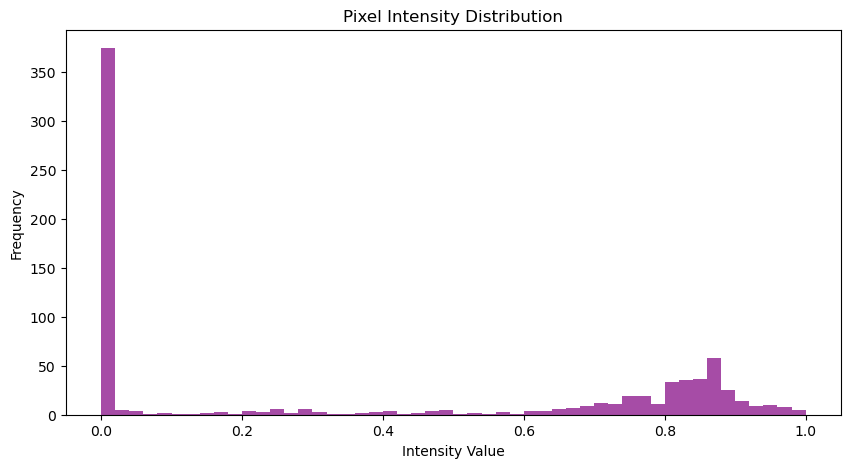

Dataset Mean: 0.2860
Dataset Std: 0.3530


In [10]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. SETUP & CONFIGURATION
# Accessing data from the path defined in your DataIngestion component
DATA_PATH = os.path.join('..', 'artifacts', 'fashion_data') 
BATCH_SIZE = 64

# Transform to ToTensor for analysis
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset (Already downloaded by your DataIngestion script)
train_dataset = datasets.FashionMNIST(root=DATA_PATH, train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Mapping for Fashion-MNIST labels
labels_map = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"
}

# 2. DATASET OVERVIEW
print(f"Total Training Images: {len(train_dataset)}")
image, label = train_dataset[0]
print(f"Image Shape: {image.shape}") # [1, 28, 28] - Grayscale
print(f"Value Range: Min={image.min():.4f}, Max={image.max():.4f}")

# 3. CLASS DISTRIBUTION ANALYSIS
# Crucial for GANs to avoid Mode Collapse 
targets = train_dataset.targets.numpy()
unique, counts = np.unique(targets, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar([labels_map[i] for i in unique], counts, color='teal')
plt.title("Class Distribution (Fashion-MNIST)")
plt.ylabel("Count")
plt.show()

# 4. VISUAL EXPLORATION
# Understanding the visual features the Generator must replicate [cite: 52, 171]

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.tight_layout()
plt.show()

# 5. PIXEL INTENSITY DISTRIBUTION
# Essential for deciding on GAN activation (e.g., Tanh vs Sigmoid) [cite: 161]

plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), bins=50, color='purple', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()

# 6. MEAN & STD CALCULATION
# Required for the normalization step in your gan_trainer.py pipeline [cite: 131]
imgs = torch.stack([img for img, _ in train_dataset], dim=3)
mean = imgs.view(1, -1).mean(dim=1)
std = imgs.view(1, -1).std(dim=1)
print(f"Dataset Mean: {mean.item():.4f}")
print(f"Dataset Std: {std.item():.4f}")